## 1.
Write computer codes for the following methods of finding roots (or zeros) of nonlinear
equation f (x) = 0
1. Iteration method
2. Bisection method
3. Method of false position (Regula falsi method)
4. Newton-Raphson method
5. Secant method

In [15]:
import numpy as np

### Iteration method

In [1]:
# Example usage:
def g(x):
    return 0.5*(x + 2/x)

In [2]:
def fixed_point_iteration(g, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        x_new = g(x)
        if abs(x_new - x) < tol:
            return x_new, i + 1 

        x = x_new

    raise ValueError("Fixed-point iteration did not converge within the maximum number of iterations")


In [3]:
fixed_point_iteration(g, 1, 1e-12, 100)

(1.414213562373095, 6)

### Bisection method

In [4]:
def bisection(f, a, b, tol=1e-12):
    if f(a) * f(b) > 0:
        print("Root does not exist on this interval")
    while abs(a - b) > tol:
        c = (a + b) / 2
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
    print("Approximate root:", (a + b) / 2)

In [5]:
def f(x):
    return x**2 - 2

In [6]:
bisection(f, 1, 2)

Approximate root: 1.414213562372879


### Method of false position (Regula falsi method)

In [7]:
def regula_falsi(f, a, b, tol=1e-6, max_itr = 100):
    if f(a) * f(b) > 0:
        print("Root does not exist on this interval") 
        return
    
    for itr in range(max_itr):
        c = b - (f(b) * (b - a)) / (f(b) - f(a))
        if abs(f(c)) < tol:
            print("Approximate root:", c, "itr: ", itr)
            return
        elif f(a)*f(c)<=0:
            b =c
        else:
            a = c

In [8]:
regula_falsi(f, 1, 2)

Approximate root: 1.4142134998513232 itr:  8


### Newton-Raphson method

In [9]:
def newton_raphson(f, fp, x0, tol = 1e-6, max_itr = 1000):
    for itr in range(max_itr):
        x1 = x0 - f(x0)/fp(x0)
        if abs(x1-x0)<tol:
            print("Approximate root:",  x1)
            return
        x0 = x1
    print("Method did not converge")
        

In [10]:
def f(x):
    return x**2 - 2
def fp(x):
    return 2*x
newton_raphson(f, fp, 1.5, 1e-6, 10000)

Approximate root: 1.4142135623730951


### Secant method

In [11]:
def secant(f, x0, x1, tol = 1e-6, max_itr = 100):
    for itr in range(max_itr):
        x2 = x1 - (f(x1)*(x1 - x0))/ (f(x1) - f(x0))
        if abs(x2-x1)<tol:
            print("Approximate root:", x2)
            return
        x0 = x1
        x1 = x2
    print("Method did not converge")


In [12]:
secant(f, 1, 1.2, tol=1e-6, max_itr=10000)

Approximate root: 1.4142135623722403


## 2. 
Approximate the fixed points for the function $g(x) = x^{x−cos(x)}$ accurate to 12 decimal
places.

In [13]:
def g(x):
    return (1 + np.cos(x))


In [16]:
fixed_point_iteration(g, 0.7)

ValueError: Fixed-point iteration did not converge within the maximum number of iterations

# 3. Solve the following problems using the above methods.

A spherical ball of radius r = 10cm is submerged to a depth d in water. Assume
that the density of the ball is ρ = 0.638. Find the depth d?

$d^3 -30 d^2 + 2552 = 0$

In [17]:
def d(x):
    return x**3 - 30*x**2 + 2552

In [18]:
import matplotlib.pyplot as plt
import numpy as np

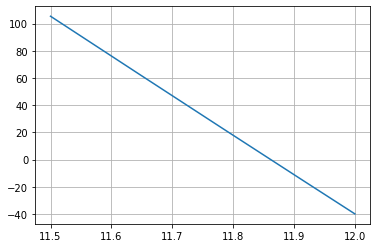

In [19]:
x = np.linspace(11.5, 12, 1200)
y = d(x)
plt.plot(x, y)
plt.grid(True)

In [20]:
def g3(x):
    return (x**3 + 2552)/30*x

In [21]:
bisection(d, 11.5, 11.9)

Approximate root: 11.861501508120636


In [22]:
regula_falsi(d, 11.5, 11.9)

Approximate root: 11.861501508188738 itr:  3


In [23]:
def dp(x):
    return 3*(x**2) - 60*x
newton_raphson(d, dp, 11.6)

Approximate root: 11.861501508120416


In [24]:
secant(d, 11.5, 11.6)

Approximate root: 11.861501508120414


### (B)
Suppose a projectile is fired from the origin with an angle of elevation θ0 and initial
velocity v0 . The equations of motion for a projectile with air resistance, which is
directly proportional to the velocity of the projectile (i.e., Stokes drag) are

$y(t) = (Cv_y + C^2 g)(1 − e^{−t/C} )$

$x(t) = Cv_x (1 − e^{−t/C} )$

where $v_x$ and $v_y$ are the horizontal and vertical components of the velocity, g is the
acceleration due to gravity and C = m/k, ratio of mass of the projectile and the
coefficient of air friction. Find the time of flight and the range of the projectile if
θ0 = 45◦ and v0 = 100 m/s. [Take C = 10 and g = 9.8m/s2 ].

In [28]:
def y(t):
    return 1480*(1-np.exp(-t/10)) - 98*t

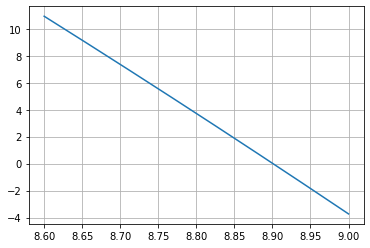

In [26]:
x = np.linspace(8.6, 9, 1200)
y = y(x)
plt.plot(x, y)
plt.grid(True)

In [29]:
bisection(y, 8.6, 9)

Approximate root: 8.900792092542181


In [30]:
regula_falsi(y, 8.6, 9)

Approximate root: 8.900792091261845 itr:  3


In [31]:
def yp(x):
    return 148*np.exp(-x/10)-98
newton_raphson(y, yp, 8.6)

Approximate root: 8.90079209254198


In [32]:
secant(y, 8.5, 8.6)

Approximate root: 8.900792092547233


## (C)
Let h(x) = x sin(x). Find the value of x that lies in the interval [0, 2], where the
function takes on the value h(x) = 1 (the function sin(x) is evaluated in radians).

In [33]:
def h(x):
    return x*(np.sin(x))-1

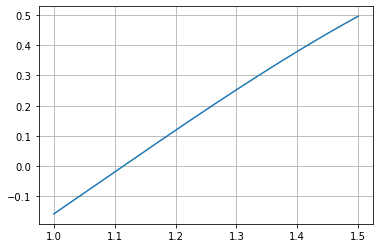

In [34]:
x = np.linspace(1, 1.5, 1200)
y = h(x)
plt.plot(x, y)
plt.grid(True)

In [35]:
bisection(h, 1, 1.5)

Approximate root: 1.1141571408720665


In [36]:
regula_falsi(h, 1, 1.5)

Approximate root: 1.114157140746564 itr:  2


In [37]:
def hp(x):
    return x*(np.cos(x))+ np.sin(x)
newton_raphson(h, hp, 1)

Approximate root: 1.11415714087193


In [38]:
secant(h, 1, 1.1)

Approximate root: 1.114157140871928


## (d) 
A unit sphere is cut into two segments by a plane. One segment has three times the volume of the other. Determine the distance $x$ of the plane from the center of the sphere (accurate to 10 decimal places). [Hint: The volume of a spherical cap of hight $h$ cut from a sphere of radius $r$ is $\left.V_c=\frac{\pi h^2}{3}(3 r-h)\right]$

In [42]:
def equation(x, r):
    return np.pi * (r + x)**2 / 3 * (3 * r - (r + x)) - 3 * np.pi * (r - x)**2 / 3 * (3 * r - (r - x))

In [43]:
# Radius of the unit sphere
r = 1.0

# Initial interval for bisection
a = 0.0
b = 1.0

# Solve the equation using the bisection method
result = bisection(equation, a, b)

# Print the result (distance x from the center of the sphere)
if result is not None:
    print(f"The distance x is approximately: {result:.10f}")


The distance x is approximately: 0.3472963553


### 4. 
Use Newton’s square-root and cube-root methods to approximate 7 and $7^{1/3}$ accurate to 10 decimal places.

In [41]:
def newton_sqrt(A, x0, tol=1e-10, max_iter=1000):
    for itr in range(max_iter):
        x1 = 0.5*(x0 + A/x0)
        if abs(x1-x0) < tol:
            return x1, itr
        x0 = x1

In [42]:
newton_sqrt(7, 1)

(2.6457513110645907, 5)

In [53]:
def sq(x):
    return x**2 - 7
def sq_dev(x):
    return 2*x
newton_raphson(sq, sq_dev, 1)

Approximate root: 2.6457513110645907


In [43]:
def newton_cube(A, x0, tol=1e-10, max_iter=1000):
    for itr in range(max_iter):
        x1 = (1/3)*(2*x0+A/(x0**2))
        if abs(x1-x0) < tol:
            return x1, itr
        x0 = x1    

In [44]:
newton_cube(7, 1)

(1.912931182772389, 6)

In [55]:
def cube(x):
    return x**3 - 7
def cube_dev(x):
    return 3*x**2
newton_raphson(cube, cube_dev, 1)

Approximate root: 1.9129311827727737


# 5. 
Starting with an initial approximation $p_0=2$, find the root $p=1$ of order $M=2$ for the function $f(x)=(x-1) \ln (x)$ using accelerated Newton-Raphson algorithm.

In [57]:
def acc_newton_raphson(f, fp, x0, m, tol = 1e-6, max_itr = 1000):
    for itr in range(max_itr):
        x1 = x0 - m*(f(x0)/fp(x0))
        if abs(x1-x0)<tol:
            print("Approximate root:",  x1)
            return
        x0 = x1
    print("Method did not converge")

def f(x):
    return (x-1)*(np.log(x))
def fp(x):
    return (1 + np.log(x) - 1/x)
acc_newton_raphson(f, fp, 2, 2)

Approximate root: 1.0
